In [ ]:
using DelimitedFiles

# Training range
# tspan = (0.3, 9.0)
# num_of_samples = 1000
# tsteps = range(tspan[1], tspan[2], length = num_of_samples)

start_idx = 300
end_idx = 350

2000

In [386]:
loaded_data = readdlm("dataNorm/original_extrapolation.txt")
original_data = Array{Float64}(loaded_data)
original_data = original_data[start_idx:end_idx, :]

1701×7 Matrix{Float64}:
 14.8421  110.79     9.69786  143.421   0.0    0.0     88.7441
 14.8626  110.263    8.54939  143.421   0.0    0.0     88.2511
 16.0464  109.738    8.29383  143.421  -0.0    0.0     87.7662
 19.0386  109.217    8.44442  143.421  -0.0    0.0     87.2846
 23.8065  108.699    8.59191  143.421  -0.0    0.0     86.8051
 30.2978  108.183    8.73637  143.421  -0.0   -0.0     86.3237
 38.4413  107.67     8.87789  143.421  -0.0   -0.0     85.8495
 48.1476  107.16     9.01653  143.421  -0.0    0.0     85.3676
 59.3105  106.653    9.15236  143.421  -0.0   -0.0     84.9062
 71.8073  106.149    9.28546  143.421  -0.0    0.0     84.4393
  ⋮                                            ⋮       
 13.4227   94.5251  11.4068   129.227  -0.0   30.0157  72.223
 13.5524   94.0961  12.0756   130.524   0.0  224.675   71.8238
 13.8261   93.6695  13.4579   133.261  -0.0  301.211   71.4211
 14.1209   93.2453  14.5306   136.209  -0.0  278.3     71.0128
 14.3551   92.8236  14.5907   138.551  

In [ ]:
loaded_data = readdlm("dataNorm/pinn_extrapolation.txt")
pinn_data = Array{Float64}(loaded_data)
pinn_data = pinn_data[start_idx:end_idx, :]
# pinn_data[:, 6] .= 1.0

1701×7 Matrix{Float64}:
 227.233    67.1964  11.5201    96.553      226.254  961.706        82.6161
 227.846    67.2917  11.5141    97.233      290.414  963.131        82.7631
 240.444    67.5336  11.6182   101.8       3095.05   958.786        81.8023
 283.548    69.5237  11.7442   102.855    11722.5    952.969        82.0198
 353.803    74.808   11.8705    95.6706   24034.0    947.128        84.9693
 446.37     84.1962  11.9974    78.152    38166.5    941.283        91.323
 556.541    97.9943  12.1253    49.4508   52723.5    935.438       101.333
 679.307   116.118   12.2545     9.6903   66573.8    929.592       114.925
 809.405   138.166   12.3855   -40.2134   78797.5    923.747       131.765
 941.603   163.491   12.5185   -98.7169   88696.7    917.902       151.31
   ⋮                                                   ⋮          
 822.786  4491.48    38.5662  1742.41    -97676.5      1.62883e5  3286.39
 818.841  4430.43    38.3848  1963.94    -97694.4      1.60805e5  3236.53
 817.60

In [388]:
loaded_data = readdlm("dataNorm/simple_extrapolation.txt")
simple_data = Array{Float64}(loaded_data)
simple_data = simple_data[start_idx:end_idx, :]
# simple_data[:, 6] .= 1.0

1701×7 Matrix{Float64}:
  4.39621  66.2519  4.65716  146.687  2.5099e-6    43.492      55.4907
  4.42199  65.7626  4.66812  147.119  2.5099e-6    41.0219     55.04
  5.19631  65.2773  4.70619  147.249  2.5099e-6     1.3387e-5  54.5686
  7.14376  64.7963  4.75561  147.249  2.5099e-6     1.3387e-5  54.0907
 10.2469   64.3194  4.80459  147.249  2.5099e-6     1.3387e-5  53.617
 14.4717   63.8468  4.85314  147.249  2.5099e-6     1.3387e-5  53.1474
 19.7717   63.3783  4.90127  147.249  2.5099e-6     1.3387e-5  52.682
 26.089    62.9139  4.94898  147.249  2.5099e-6     1.3387e-5  52.2206
 33.3542   62.4536  4.99627  147.249  2.5099e-6     1.3387e-5  51.7633
 41.4876   61.9973  5.04314  147.249  2.5099e-6     1.3387e-5  51.31
  ⋮                                                 ⋮          
  4.27327  69.4469  4.54843  144.272  0.000115679  45.8601     58.4671
  4.28698  68.9314  4.55985  144.729  0.000115679  45.4795     57.9923
  4.30057  68.42    4.57119  145.182  0.000115679  45.1035     57.

In [389]:
using Plots

function plot_differences(idx)
    x = 1:size(original_data, 1)
    
    y1 = original_data[:, idx]
    y2 = pinn_data[:, idx]
    y3 = simple_data[:, idx]
    
    plot(x, y1, label="Original", lw=2)
    plot!(x, y2, label="PINN", lw=2, linestyle=:dash)
    plot!(x, y3, label="Simple", lw=2, linestyle=:dot)
end

plot_differences (generic function with 1 method)

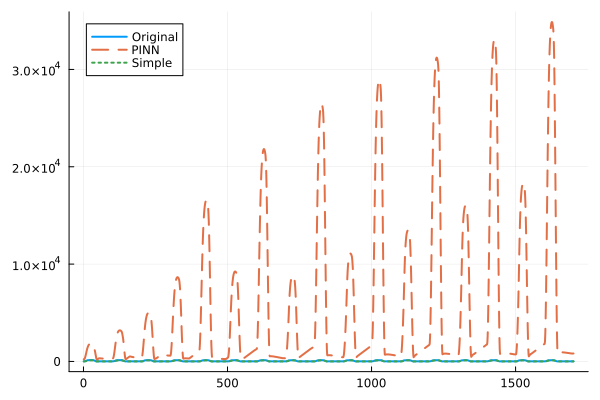

In [390]:
plot_differences(1)

In [391]:
function plot_diff_layout()
    layout = @layout [a b c; d e f; g e f]

    plot(
        plot_differences(1),
        plot_differences(2),
        plot_differences(3),
        plot_differences(4),
        plot_differences(5),
        plot_differences(6),
        plot_differences(7),
        layout = layout,
        size = (1000, 800)
    )
end

plot_diff_layout (generic function with 1 method)

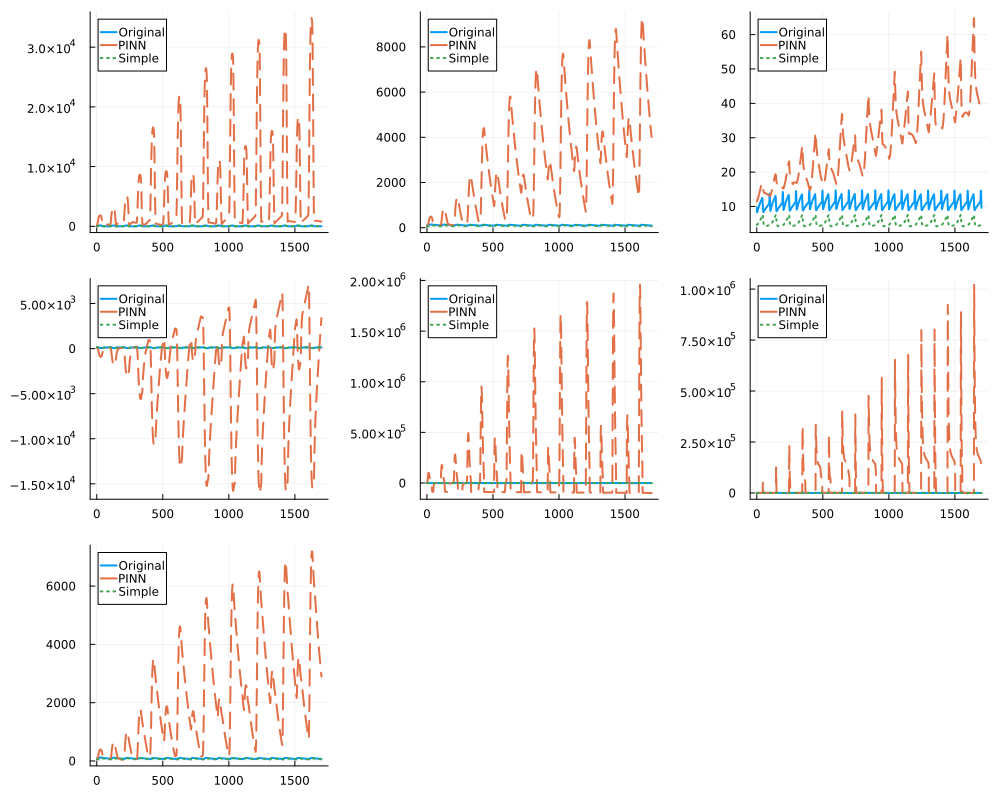

In [392]:
plot_diff_layout()